In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import sklearn.datasets
import init_utils
import reg_utils
import gc_utils
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

C:\Users\zengkang\deep_learning\improve_deep_nn\reg_utils.py:61: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
C:\Users\zengkang\deep_learning\improve_deep_nn\reg_utils.py:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


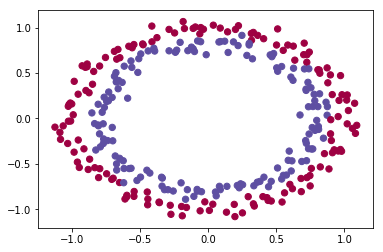

In [2]:
train_X,train_Y,test_X,test_Y = init_utils.load_dataset(is_plot=True)

In [3]:
def nn_model(X,Y,learning_rate = 0.0075,num_iterations =15000,initialization = 'he',print_cost = True,is_plot = False):
    grad = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    
    if initialization == 'zeros':
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == 'random':
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == 'he':
        parameters = initialize_parameters_he(layers_dims)
    else:
        print('模型参数初始化错误')
        exit
        
    for i in range(0,num_iterations):
        a3,cache = init_utils.forward_propagation(X,parameters)
        cost = init_utils.compute_loss(a3,Y)
        grads = init_utils.backward_propagation(X,Y,cache)
        parameters =init_utils.update_parameters(parameters,grads,learning_rate)
        
        if i % 1000 == 0:
            costs.append(cost)
            if print_cost:
                print('第{}次迭代，cost = {}'.format(i,cost))
        
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iteration(per hundreds)')
        plt.title('learning rate = ' + str(learning_rate))
    
    return parameters

In [4]:
# 初始化为0
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    
    L = len(layers_dims)
    
    for l in range(1,L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l] ,1))

        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))
        
    return parameters

In [5]:
# 测试initialize_parameters_zeros
parameters = initialize_parameters_zeros([3,2,1])
print('W1 = ' + str(parameters['W1']))
print('b1 = ' + str(parameters['b1']))
print('W2 = ' + str(parameters['W2']))
print('b2 = ' + str(parameters['b2']))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


第0次迭代，cost = 0.6931471805599453
第1000次迭代，cost = 0.6931471805599453
第2000次迭代，cost = 0.6931471805599453
第3000次迭代，cost = 0.6931471805599453
第4000次迭代，cost = 0.6931471805599453
第5000次迭代，cost = 0.6931471805599453
第6000次迭代，cost = 0.6931471805599453
第7000次迭代，cost = 0.6931471805599453
第8000次迭代，cost = 0.6931471805599453
第9000次迭代，cost = 0.6931471805599453
第10000次迭代，cost = 0.6931471805599453
第11000次迭代，cost = 0.6931471805599453
第12000次迭代，cost = 0.6931471805599453
第13000次迭代，cost = 0.6931471805599453
第14000次迭代，cost = 0.6931471805599453


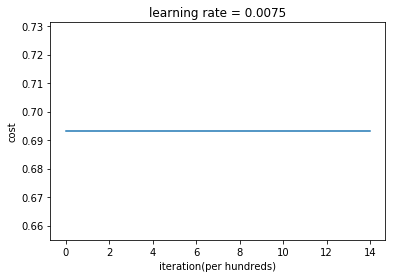

In [6]:
parameters = nn_model(train_X,train_Y,initialization='zeros',is_plot=True)

In [7]:
print('训练集:')
prediction_train = init_utils.predict(train_X,train_Y,parameters)
print('测试集:')
prediction_test = init_utils.predict(test_X,test_Y,parameters)

训练集:
Accuracy: 0.5
测试集:
Accuracy: 0.5


predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


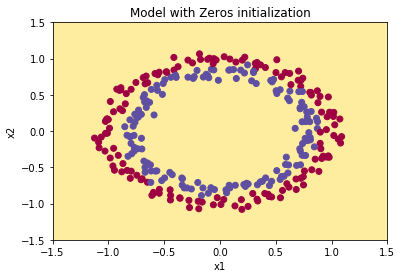

In [8]:
print("predictions_train = " + str(prediction_train))
print("predictions_test = " + str(prediction_test))

plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))

In [9]:
# 随机初始化
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        
        assert(parameters['W'+str(l)].shape == (layers_dims[l],layers_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l] ,1))
        
    return parameters

In [10]:
# 测试initialize_parameters_random
parameters = initialize_parameters_random([3,2,1])
print('W1 = ' + str(parameters['W1']))
print('b1 = ' + str(parameters['b1']))
print('W2 = ' + str(parameters['W2']))
print('b2 = ' + str(parameters['b2']))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


C:\Users\zengkang\deep_learning\improve_deep_nn\init_utils.py:51: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\zengkang\deep_learning\improve_deep_nn\init_utils.py:51: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)


第0次迭代，cost = inf
第1000次迭代，cost = 0.6697131272647834
第2000次迭代，cost = 0.6273762783082077
第3000次迭代，cost = 0.6144843528032181
第4000次迭代，cost = 0.5952649851020372
第5000次迭代，cost = 0.5691750644341136
第6000次迭代，cost = 0.5522671283206232
第7000次迭代，cost = 0.5426450050218788
第8000次迭代，cost = 0.4351484922101877
第9000次迭代，cost = 0.4044028318416713
第10000次迭代，cost = 0.3991725398830497
第11000次迭代，cost = 0.39351607745135125
第12000次迭代，cost = 0.39108140447378364
第13000次迭代，cost = 0.3887351910641595
第14000次迭代，cost = 0.38647308359698546


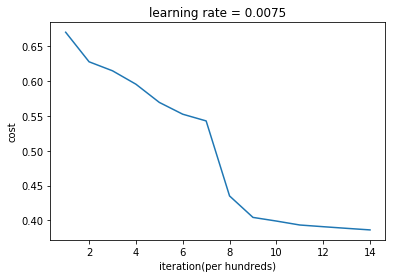

In [11]:
parameters = nn_model(train_X,train_Y,initialization='random',is_plot=True)

In [12]:
print('训练集:')
prediction_train = init_utils.predict(train_X,train_Y,parameters)
print('测试集:')
prediction_test = init_utils.predict(test_X,test_Y,parameters)

训练集:
Accuracy: 0.8266666666666667
测试集:
Accuracy: 0.85


predictions_train = [[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
predictions_test = [[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


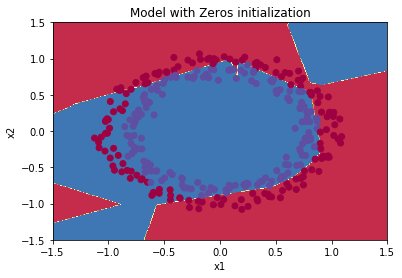

In [13]:
print("predictions_train = " + str(prediction_train))
print("predictions_test = " + str(prediction_test))

plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))

In [14]:
# 抑梯度异常初始化
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters={}
    L = len(layers_dims)
    
    for l in range(1,L):
        parameters['W' +str(l)] = np.random.randn(layers_dims[l],layers_dims[l - 1]) * np.sqrt(2 / (layers_dims[l - 1]))
        parameters['b' +str(l)] = np.zeros((layers_dims[l] , 1))
        
        assert(parameters['W' +str(l)].shape == (layers_dims[l],layers_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l] ,1))
        
    return parameters

In [15]:
## 测试initialize_parameters_he
parameters = initialize_parameters_he([3,2,1])
print('W1 = ' + str(parameters['W1']))
print('b1 = ' + str(parameters['b1']))
print('W2 = ' + str(parameters['W2']))
print('b2 = ' + str(parameters['b2']))

W1 = [[ 1.46040903  0.3564088   0.07878985]
 [-1.52153542 -0.22648652 -0.28965949]]
b1 = [[0.]
 [0.]]
W2 = [[-0.08274148 -0.62700068]]
b2 = [[0.]]


第0次迭代，cost = 0.8830537463419761
第1000次迭代，cost = 0.6921605504378515
第2000次迭代，cost = 0.6819558863711098
第3000次迭代，cost = 0.6711519946557173
第4000次迭代，cost = 0.6526092943378784
第5000次迭代，cost = 0.6218599097246662
第6000次迭代，cost = 0.5746717909665358
第7000次迭代，cost = 0.5013980814682811
第8000次迭代，cost = 0.4138522633026198
第9000次迭代，cost = 0.33456613415616343
第10000次迭代，cost = 0.2711741867676591
第11000次迭代，cost = 0.2226802799610644
第12000次迭代，cost = 0.1859700069253398
第13000次迭代，cost = 0.15770781937427772
第14000次迭代，cost = 0.13636566748309079


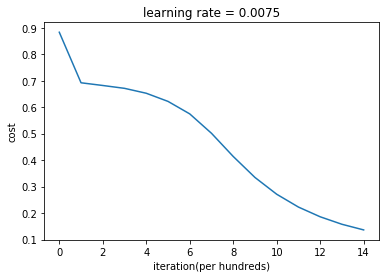

In [16]:
parameters = nn_model(train_X,train_Y,initialization='he',is_plot=True)

In [17]:
print('训练集:')
prediction_train = init_utils.predict(train_X,train_Y,parameters)
print('测试集:')
prediction_test = init_utils.predict(test_X,test_Y,parameters)

训练集:
Accuracy: 0.9866666666666667
测试集:
Accuracy: 0.94


predictions_train = [[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
predictions_test = [[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


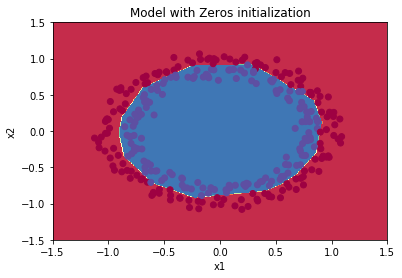

In [18]:
print("predictions_train = " + str(prediction_train))
print("predictions_test = " + str(prediction_test))

plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))

## 正则化

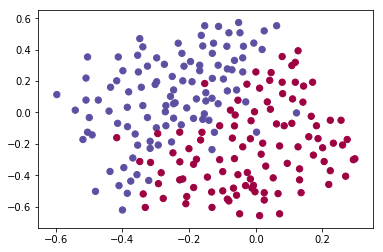

In [19]:
train_X,train_Y,test_X,test_Y = reg_utils.load_2D_dataset(is_plot=True)

In [33]:
def model(X,Y,learning_rate = 0.3,num_iterations = 30000,print_cost = True,is_plot = True,lbd = 0,keep_probs = 1):
    parameters = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],20,3,1]
    
    parameters = reg_utils.initialize_parameters(layers_dims)
    
    for i in range(1,num_iterations):
        # 前向传播
        if keep_probs == 1: # 不随机删除节点
            a3,cache = reg_utils.forward_propagation(X,parameters)
        elif keep_probs < 1:
            a3,cache = forward_propagation_with_dropout(X,parameters)
        else:
            print('keep prob 参数出错！程序退出')
            exit
            
        if lbd == 0:
            cost = reg_utils.compute_cost(a3,Y)
        else:
            cost = compute_cost_with_regularization(a3,Y,parameters,lbd)

        assert(lbd == 0 or keep_probs == 1)

        if (lbd == 0 and keep_probs == 1):
            grads = reg_utils.backward_propagation(X,Y,cache)
        elif lbd != 0:
            grads = backward_propagation_with_regularization(X,Y,cache,lbd)
        elif keep_probs < 1:
            grads = backward_propagation_with_dropout(X,Y,cache,keep_probs)

        parameters = reg_utils.update_parameters(parameters,grads,learning_rate)

        if i % 1000 == 0:
            costs.append(cost)
            if (print_cost and i % 10000 == 0):
                print('第{}次迭代，cost={}'.format(i,cost))
        
    if is_plot:
        plt.plot(costs)
        plt.xlabel('iterations(per hundreds)')
        plt.ylabel('cost')
        plt.title('learning rate 为 '+str(learning_rate))
        plt.show()
    
    return parameters

第10000次迭代，cost=0.16728967807457523
第20000次迭代，cost=0.13925724756566693


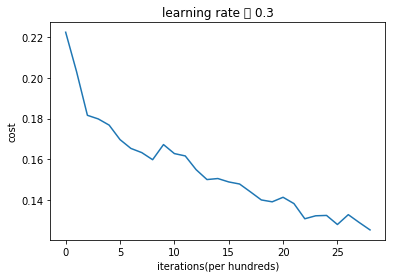

训练集：
Accuracy: 0.9383886255924171
测试集：
Accuracy: 0.925


In [26]:
# 不使用正则化
parameters = model(train_X,train_Y,is_plot = True)
print('训练集：')
predictions_train = reg_utils.predict(train_X,train_Y,parameters)
print('测试集：')
prediction_test = reg_utils.predict(test_X,test_Y,parameters)

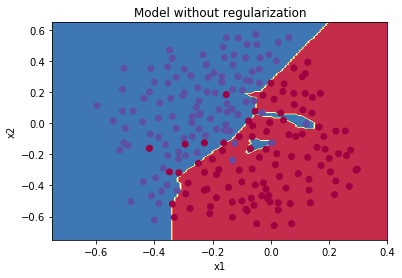

In [30]:
plt.title('Model without regularization')
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x:reg_utils.predict_dec(parameters,x.T),train_X,np.squeeze(train_Y))

In [35]:
def compute_cost_with_regularization(A3,Y,parameters,lbd):
    """
    实现公式2的L2正则化计算成本

    参数：
        A3 - 正向传播的输出结果，维度为（输出节点数量，训练/测试的数量）
        Y - 标签向量，与数据一一对应，维度为(输出节点数量，训练/测试的数量)
        parameters - 包含模型学习后的参数的字典
    返回：
        cost - 使用公式2计算出来的正则化损失的值

    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    cross_entropy_cost = reg_utils.compute_cost(A3,Y)

    L2_regularization_cost = lbd * (np.sum(np.square(W1)) + np.sum(np.square(W2))  + np.sum(np.square(W3))) / (2 * m)

    cost = cross_entropy_cost + L2_regularization_cost

    return cost

#当然，因为改变了成本函数，我们也必须改变向后传播的函数， 所有的梯度都必须根据这个新的成本值来计算。

def backward_propagation_with_regularization(X, Y, cache, lbd):
    """
    实现我们添加了L2正则化的模型的后向传播。

    参数：
        X - 输入数据集，维度为（输入节点数量，数据集里面的数量）
        Y - 标签，维度为（输出节点数量，数据集里面的数量）
        cache - 来自forward_propagation（）的cache输出
        lambda - regularization超参数，实数

    返回：
        gradients - 一个包含了每个参数、激活值和预激活值变量的梯度的字典
    """

    m = X.shape[1]

    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y

    dW3 = (1 / m) * np.dot(dZ3,A2.T) + ((lbd * W3) / m )
    db3 = (1 / m) * np.sum(dZ3,axis=1,keepdims=True)

    dA2 = np.dot(W3.T,dZ3)
    dZ2 = np.multiply(dA2,np.int64(A2 > 0))
    dW2 = (1 / m) * np.dot(dZ2,A1.T) + ((lbd * W2) / m)
    db2 = (1 / m) * np.sum(dZ2,axis=1,keepdims=True)

    dA1 = np.dot(W2.T,dZ2)
    dZ1 = np.multiply(dA1,np.int64(A1 > 0))
    dW1 = (1 / m) * np.dot(dZ1,X.T) + ((lbd * W1) / m)
    db1 = (1 / m) * np.sum(dZ1,axis=1,keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

第10000次迭代，cost=0.2713877189858277
第20000次迭代，cost=0.2709524123093645


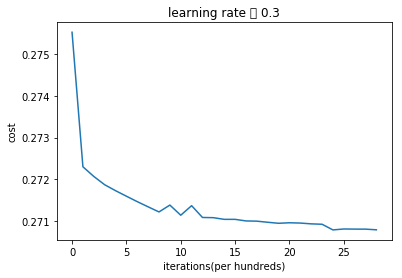

训练集：
Accuracy: 0.9289099526066351
测试集：
Accuracy: 0.935


In [36]:
# 使用正则化
parameters = model(train_X,train_Y,lbd = 0.75,is_plot = True)
print('训练集：')
predictions_train = reg_utils.predict(train_X,train_Y,parameters)
print('测试集：')
prediction_test = reg_utils.predict(test_X,test_Y,parameters)

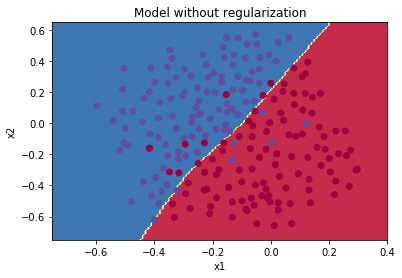

In [37]:
plt.title('Model without regularization')
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x:reg_utils.predict_dec(parameters,x.T),train_X,np.squeeze(train_Y))

In [62]:
def forward_propagation_with_dropout(X,parameters,keep_prob = 0.5):
    np.random.seed(1)
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = np.dot(W1,X) + b1
    A1 = reg_utils.relu(Z1)
    
    D1  = np.random.randn(A1.shape[0],A1.shape[1])
    D1 = D1 < keep_prob
    A1 = A1 * D1
    A1 = A1 / keep_prob

    Z2 = np.dot(W2,A1) + b2
    A2 = reg_utils.relu(Z2)

    #下面的步骤1-4对应于上述的步骤1-4。
    D2 = np.random.randn(A2.shape[0],A2.shape[1])    #步骤1：初始化矩阵D2 = np.random.rand(..., ...)
    D2 = D2 < keep_prob                             #步骤2：将D2的值转换为0或1（使​​用keep_prob作为阈值）
    A2 = A2 * D2                                    #步骤3：舍弃A1的一些节点（将它的值变为0或False）
    A2 = A2 / keep_prob                             #步骤4：缩放未舍弃的节点(不为0)的值

    Z3 = np.dot(W3, A2) + b3
    A3 = reg_utils.sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache

In [65]:
def backward_propagation_with_dropout(X,Y,cache,keep_prob):
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = (1 / m )*np.dot(dZ3,A2.T)
    db3 = (1./m)*np.sum(dZ3,axis = 1,keepdims=True)
    dA2 = np.dot(W3.T,dZ3)
    
    dA2 = dA2 * D2
    dA2 = dA2 / keep_prob
    
    dZ2 = np.multiply(dA2,np.int64(A2 > 0))
    dW2 = (1./m) * np.dot(dZ2,A1.T)
    db2 = (1./m) * np.sum(dZ2,axis = 1,keepdims=True)
    dA1 = np.dot(W2.T,dZ2)
    
    dA1 = dA1 * D1
    dA1 = dA1 / keep_prob

    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1. / m * np.dot(dZ1, X.T)
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

C:\Users\zengkang\deep_learning\improve_deep_nn\reg_utils.py:121: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\zengkang\deep_learning\improve_deep_nn\reg_utils.py:121: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


第10000次迭代，cost=0.1099324679091784
第20000次迭代，cost=0.10984014889180616


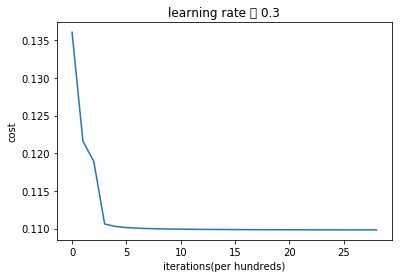

使用随机删除节点，训练集:
Accuracy: 0.9289099526066351
使用随机删除节点，测试集:
Accuracy: 0.93


In [66]:
parameters = model(train_X, train_Y, keep_probs=0.86, learning_rate=0.3,is_plot=True)

print("使用随机删除节点，训练集:")
predictions_train = reg_utils.predict(train_X, train_Y, parameters)
print("使用随机删除节点，测试集:")
reg_utils.predictions_test = reg_utils.predict(test_X, test_Y, parameters)

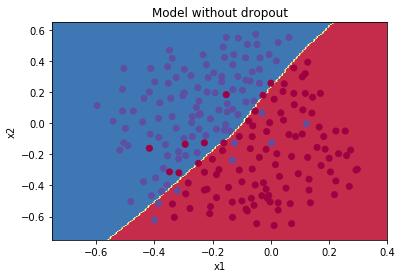

In [67]:
plt.title('Model without dropout')
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x:reg_utils.predict_dec(parameters,x.T),train_X,np.squeeze(train_Y))

In [68]:
def forward_propagration(x,theta):
    J = np.dot(x,theta)
    return J

In [74]:
def backward_propagation(x,theta):
    dtheta = x
    return dtheta

In [72]:
def gradient_check(x,theta,epsilon=1e-7):
    thetaplus = theta + epsilon
    thetaminus = theta - epsilon
    J_plus = forward_propagration(x,thetaplus)
    J_minus = forward_propagration(x,thetaminus)
    gradapprox = (J_plus - J_minus) / (2 * epsilon)
    
    grad = backward_propagation(x,theta)

    numerator = np.linalg.norm(grad - gradapprox)                      # Step 1'
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)    # Step 2'
    difference = numerator / denominator                               # Step 3'
    
    if difference < 1e-7:
        print('梯度检查正常')
    else:
        print('梯度检查异常，超出阈值')
    
    return difference

In [75]:
#测试gradient_check
print("-----------------测试gradient_check-----------------")
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

-----------------测试gradient_check-----------------
梯度检查正常
difference = 2.919335883291695e-10


In [76]:
def forward_propagation_n(X,Y,parameters):
    """
    实现图中的前向传播（并计算成本）。

    参数：
        X - 训练集为m个例子
        Y -  m个示例的标签
        parameters - 包含参数“W1”，“b1”，“W2”，“b2”，“W3”，“b3”的python字典：
            W1  - 权重矩阵，维度为（5,4）
            b1  - 偏向量，维度为（5,1）
            W2  - 权重矩阵，维度为（3,5）
            b2  - 偏向量，维度为（3,1）
            W3  - 权重矩阵，维度为（1,3）
            b3  - 偏向量，维度为（1,1）

    返回：
        cost - 成本函数（logistic）
    """
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1,X) + b1
    A1 = gc_utils.relu(Z1)

    Z2 = np.dot(W2,A1) + b2
    A2 = gc_utils.relu(Z2)

    Z3 = np.dot(W3,A2) + b3
    A3 = gc_utils.sigmoid(Z3)

    #计算成本
    logprobs = np.multiply(-np.log(A3), Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = (1 / m) * np.sum(logprobs)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)

    return cost, cache

def backward_propagation_n(X,Y,cache):
    """
    实现图中所示的反向传播。

    参数：
        X - 输入数据点（输入节点数量，1）
        Y - 标签
        cache - 来自forward_propagation_n（）的cache输出

    返回：
        gradients - 一个字典，其中包含与每个参数、激活和激活前变量相关的成本梯度。
    """
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = (1. / m) * np.dot(dZ3,A2.T)
    dW3 = 1. / m * np.dot(dZ3, A2.T)
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    #dW2 = 1. / m * np.dot(dZ2, A1.T) * 2  # Should not multiply by 2
    dW2 = 1. / m * np.dot(dZ2, A1.T)
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1. / m * np.dot(dZ1, X.T)
    #db1 = 4. / m * np.sum(dZ1, axis=1, keepdims=True) # Should not multiply by 4
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients